# **Eksperimen Machine Learning - Bank Customer Churn**

**Nama:** Made Aditya Nugraha Arya Putra

## **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## **2. Load Dataset**

In [2]:
df = pd.read_csv('../churn_raw.csv')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print('Dataset Info:')
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## **3. Exploratory Data Analysis**

In [4]:
print('Statistik Deskriptif:')
df.describe()

Statistik Deskriptif:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Distribusi Target (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64
Persentase:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


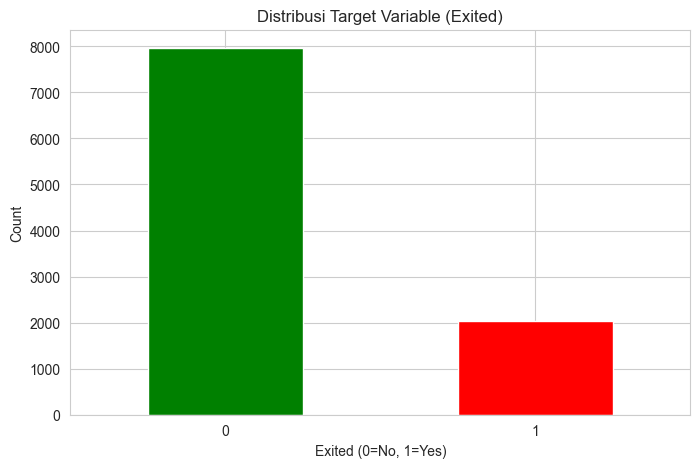

In [6]:
print('Distribusi Target (Exited):')
print(df['Exited'].value_counts())
print('Persentase:')
print(df['Exited'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df['Exited'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribusi Target Variable (Exited)')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## **4. Data Preprocessing**

In [7]:
print('Dropping unnecessary columns...')
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(f'Shape after dropping: {df_processed.shape}')

Dropping unnecessary columns...
Shape after dropping: (10000, 11)


In [8]:
print('Encoding categorical features...')
df_encoded = pd.get_dummies(df_processed, columns=['Geography', 'Gender'], drop_first=True)
print(f'Shape after encoding: {df_encoded.shape}')
print('Columns:', df_encoded.columns.tolist())

Encoding categorical features...
Shape after encoding: (10000, 12)
Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


In [9]:
print('Scaling numerical features...')
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print('Scaling completed!')
print('Statistik setelah scaling:')
print(df_encoded[numerical_cols].describe())

Scaling numerical features...
Scaling completed!
Statistik setelah scaling:
        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16  2.318146e-16 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00 -1.994969e+00 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01 -6.600185e-01 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02 -1.832505e-01 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01  4.842246e-01  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00  5.061197e+00  1.724464e+00  2.795323e+00   4.246377e+00   

       EstimatedSalary  
count     1.000000e+04  
mean     -2.877698e-17  
std       1.000050e+00  
min      -1.740268e+00  
25%      -8.535935e-01  
50%       1.802807e-03  
75%       8.572431e-01  
max

In [10]:
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

print('Pemisahan fitur dan target selesai!')
print(f'Shape X (features): {X.shape}')
print(f'Shape y (target): {y.shape}')
print(f'Jumlah fitur: {X.shape[1]}')

Pemisahan fitur dan target selesai!
Shape X (features): (10000, 11)
Shape y (target): (10000,)
Jumlah fitur: 11


## **5. Save Preprocessed Data**

In [11]:
df_final = pd.concat([X, y], axis=1)
df_final.to_csv('churn_preprocessed.csv', index=False)

print('Data berhasil disimpan!')
print(f'File: churn_preprocessed.csv')
print(f'Shape: {df_final.shape}')
df_final.head()

Data berhasil disimpan!
File: churn_preprocessed.csv
Shape: (10000, 12)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,False,False,False,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,False,True,False,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,False,False,False,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,False,False,False,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,False,True,False,0


## **6. Summary**

### Dataset:
- Dataset: Bank Customer Churn
- Total records: 10,000
- Target variable: Exited (0=No, 1=Yes)

### Preprocessing Steps:
1. Drop unnecessary columns
2. Encode categorical features
3. Scale numerical features
4. Save preprocessed data